In [1]:
import adelie as ad
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "cmr"
matplotlib.rcParams["font.size"] = "11"

In [2]:
df = pd.read_csv("../data/leukemia.csv")
X = df.iloc[:, 6:].to_numpy()
X = X - np.mean(X, axis=0)
X = X / np.std(X, axis=0, ddof=0)
y = (df["cancer"] == "allB").to_numpy()
y = y - np.mean(y)
y = y / np.std(y, ddof=0)
n, p = X.shape

In [3]:
X_new = np.concatenate([X, X**2, X**3], axis=-1)
X_new = X_new.reshape((n, 3, p))
X_new = np.transpose(X_new, axes=(0, 2, 1))
X_new = np.asfortranarray(X_new.reshape((n, -1)))
X_new = X_new - np.mean(X_new, axis=0)
X_new = X_new / np.std(X_new, axis=0, ddof=0)

In [4]:
gl_state = ad.grpnet(
    X=X_new,
    glm=ad.glm.gaussian(y),
    groups=3 * np.arange(p),
    alpha=1.0,
    early_exit=False,
)

el_state = ad.grpnet(
    X=X_new,
    glm=ad.glm.gaussian(y),
    groups=3 * np.arange(p),
    alpha=0.2,
    early_exit=False,
)

rg_state = ad.grpnet(
    X=X_new,
    glm=ad.glm.gaussian(y),
    groups=3 * np.arange(p),
    lmda_path=1e4 * np.logspace(0, -2, 10),
    alpha=0,
    early_exit=False,
)

100%|██████████| 10/10 [00:00:00<00:00:00, 191.99it/s] [dev:87.8%]


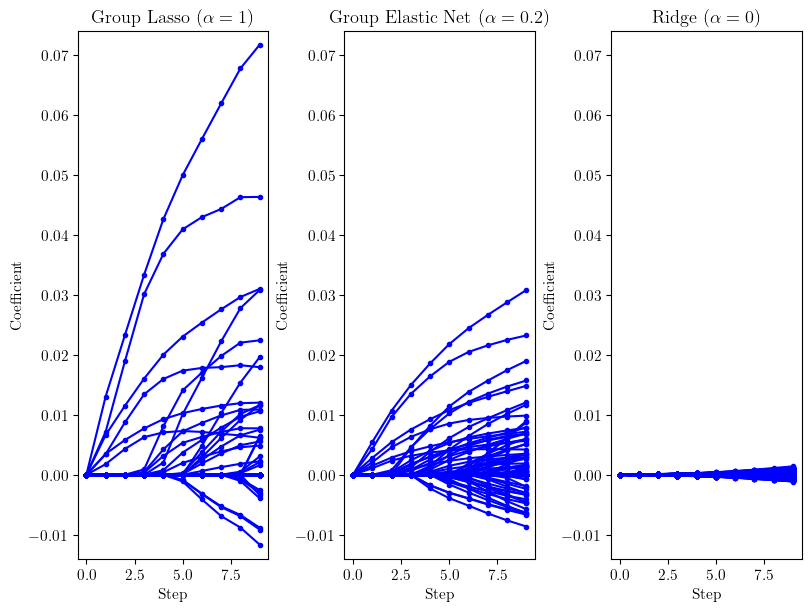

In [6]:
fig, axes = plt.subplots(1, 3, layout="constrained", figsize=(8,6))
states = [gl_state, el_state, rg_state]
names = [
    r"Group Lasso ($\alpha=1$)", 
    r"Group Elastic Net ($\alpha=0.2$)", 
    r"Ridge ($\alpha=0$)",
]
for ax, state, name in zip(axes, states, names):
    betas = state.betas
    betas = betas[:10].toarray()
    ax.plot(betas, marker='.', color="blue")
    ax.set_title(name)
    ax.set_ylabel("Coefficient")
    ax.set_xlabel("Step")
    ax.set_ylim(-0.014, 0.074)

In [7]:
fig.savefig("../figures/coefficient_profile.png", bbox_inches="tight")